In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import pandas as pd
import cmcrameri as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 

In [2]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [3]:
df_eis = pd.read_excel("../../save/eis_line_list_final_v2.xlsx",sheet_name="awsom_compare")
df_eis["ion"] = df_eis["ion"].str.strip()
df_eis["charge_stat"] = df_eis["charge_stat"].str.strip()
df_eis["quality"] = df_eis["quality"].str.strip()
df_eis["fwhm_true_err"] = df_eis["fwhm_fit"]/df_eis["fwhm_true"]*df_eis["fwhm_err"]
df_eis["Z/A"] = df_eis["Z"]/df_eis["A"]
df_eis = df_eis.sort_values(["Z/A","wvl_chianti"])
df_eis = df_eis.reset_index(drop=True)
df_eis

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom_fit,fwhm_awsom_err,fwhm_awsom_true,quality,desc,fwhm_true_cross,fwhm_true_err,Z/A
0,Fe,viii,7,55.8500,5.8,185.209,185.213,0.07648,0.00044,0.0314,NaN,NaN,0.039858,a,NaN,0.042996,0.001072,0.125336
1,Fe,viii,7,55.8500,5.8,186.600,186.598,0.07981,0.00072,0.0388,NaN,NaN,0.040446,a,NaN,0.048673,0.001481,0.125336
2,Fe,viii,7,55.8500,5.8,194.656,194.661,0.07716,0.00049,0.0331,NaN,NaN,0.048378,a,NaN,0.044194,0.001142,0.125336
3,Fe,viii,7,55.8500,5.8,253.947,253.956,0.07980,0.00280,0.0396,NaN,NaN,0.054402,a,Si X at blue wing,0.048657,0.005642,0.125336
4,Mn,viii,7,54.9380,5.8,185.449,185.463,0.08280,0.00390,0.0447,NaN,NaN,0.039677,b,bl with Fe VII,0.053435,0.007224,0.127416
5,Fe,ix,8,55.8500,5.8,189.933,189.935,0.07530,0.00060,0.0291,NaN,NaN,0.040286,a,NaN,0.040860,0.001553,0.143241
6,Fe,ix,8,55.8500,5.8,191.209,191.206,0.07710,0.00180,0.0331,NaN,NaN,0.041242,a,NaN,0.044089,0.004193,0.143241
7,Fe,ix,8,55.8500,5.8,197.856,197.854,0.08085,0.00035,0.0410,NaN,NaN,0.043069,a,NaN,0.050360,0.000690,0.143241
8,Fe,x,9,55.8500,5.9,174.521,174.531,0.07940,0.00150,0.0380,NaN,NaN,0.038511,a,NaN,0.047998,0.003134,0.161146
9,Fe,x,9,55.8500,5.9,177.230,177.240,0.08078,0.00064,0.0407,NaN,NaN,0.039047,a,NaN,0.050248,0.001270,0.161146


In [4]:
df_sumer = pd.read_excel("../../save/sumer_line_list_final_v2.xlsx",sheet_name="awsomr_compare")
df_sumer = df_sumer[df_sumer["quality"] != "c"]
df_sumer["ion"] = df_sumer["ion"].str.strip()
df_sumer["charge_stat"] = df_sumer["charge_stat"].str.strip()
df_sumer["quality"] = df_sumer["quality"].str.strip()
df_sumer["fwhm_true_err"] = df_sumer["fwhm_fit"]/df_sumer["fwhm_true"]*df_sumer["fwhm_err"]
df_sumer["Z/A"] = df_sumer["Z"]/df_sumer["A"]
df_sumer = df_sumer.sort_values(["Z/A","wvl_chianti"])
df_sumer = df_sumer.reset_index(drop=True)
df_sumer

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom,quality,fwhm_true_err,Z/A
0,Fe,viii,7,55.85000,5.8,697.155,697.156,0.2810,0.0210,0.19474,0.150,a,0.030302,0.125336
1,Fe,x,9,55.85000,5.9,1028.040,1028.053,0.3550,0.0110,0.30064,0.228,a,0.012989,0.161146
2,Ar,viii,7,39.94800,5.7,713.784,713.801,0.2830,0.0150,0.19754,0.162,a,0.021489,0.175228
3,Fe,xi,10,55.85000,6.0,680.439,680.406,0.3450,0.0280,0.28048,0.155,b,0.034441,0.179051
4,Fe,xi,10,55.85000,6.0,1028.990,1028.955,0.3220,0.0300,0.25990,0.233,a,0.037168,0.179051
5,Si,vii,6,28.08550,5.8,1049.280,1049.153,0.3510,0.0190,0.29593,0.246,a,0.022536,0.213633
6,Al,vii,6,26.98154,5.8,1053.860,1053.996,0.3080,0.0340,0.24488,0.248,a,0.042764,0.222374
7,S,x,9,32.06000,6.0,776.242,776.373,0.3580,0.0540,0.29939,0.191,a,0.064571,0.280724
8,Si,ix,8,28.08550,5.9,694.738,694.686,0.2490,0.0130,0.14180,0.167,a,0.022828,0.284844
9,Mg,viii,7,24.31000,5.9,689.629,689.641,0.2760,0.0180,0.18700,0.166,a,0.026567,0.287947


In [5]:
df_eis_ion = df_eis[["ion","charge_stat","Z","A","Z/A"]]
df_eis_ion = df_eis_ion.drop_duplicates()
df_sumer_ion = df_sumer[["ion","charge_stat","Z","A","Z/A"]]
df_sumer_ion = df_sumer_ion.drop_duplicates()
df_ion = pd.concat([df_eis_ion,df_sumer_ion],ignore_index=True)
df_ion = df_ion.drop_duplicates().sort_values("Z/A")

In [6]:
line_width_all = np.concatenate((df_eis["fwhm_awsom_true"].values,df_sumer["fwhm_awsom"].values))
line_wvl_all = np.concatenate((df_eis["wvl_chianti"].values,df_sumer["wvl_chianti"].values))
line_width_all = line_width_all/line_wvl_all*c
line_mass_all = np.concatenate((df_eis["A"].values,df_sumer["A"].values))
line_z2a_all = np.concatenate((df_eis["Z/A"].values,df_sumer["Z/A"].values))
line_tform_all = np.concatenate((df_eis["temp"].values,df_sumer["temp"].values))
eis_id = df_eis["ion"].values +" " + df_eis["charge_stat"].values + \
     " " + df_eis["wvl_chianti"].astype("int").astype("str")
sumer_id = df_sumer["ion"].values +" " + df_sumer["charge_stat"].values + \
     " " + df_sumer["wvl_chianti"].astype("int").astype("str")
eis_id_latex = df_eis["ion"].values +r"\ \textsc{" + df_eis["charge_stat"].values + r"}"
sumer_id_latex = df_sumer["ion"].values +r"\ \textsc{" + df_sumer["charge_stat"].values + r"}"
line_id_all = np.concatenate((eis_id,sumer_id))
line_id_latex_all = np.concatenate((eis_id_latex,sumer_id_latex))

turb_max_all = np.min(line_width_all)
line_width_min_all = np.sqrt(line_width_all**2 - turb_max_all**2)
temp_max_all = np.square(line_width_all)*line_mass_all*amu/2/k_B/(4*np.log(2))
temp_min_all = np.square(line_width_min_all)*line_mass_all*amu/2/k_B/(4*np.log(2))
temp_aver_all = (temp_max_all+temp_min_all)/2

In [7]:
line_df = pd.DataFrame({"line id":line_id_all,"line wvl":line_wvl_all,"line width":line_width_all*line_wvl_all/c,"line veff":line_width_all*1.e-5,
                        "line mass":line_mass_all,"line charge":line_z2a_all*line_mass_all, "Tmax":np.log10(temp_max_all), 
                        "Tmin":np.log10(temp_min_all+1)})
line_df

,line id,line wvl,line width,line veff,line mass,line charge,Tmax,Tmin
0,Fe viii 185,185.213,0.039858,64.515584,55.85000,7.0,6.702603,5.158699
1,Fe viii 186,186.598,0.040446,64.982110,55.85000,7.0,6.708861,5.337049
2,Fe viii 194,194.661,0.048378,74.505851,55.85000,7.0,6.827654,6.261625
3,Fe viii 253,253.956,0.054402,64.220626,55.85000,7.0,6.698623,4.991732
4,Mn viii 185,185.463,0.039677,64.136363,54.93800,7.0,6.690332,4.922332
5,Fe ix 189,189.935,0.040286,63.586906,55.85000,8.0,6.690009,0.000000
6,Fe ix 191,191.206,0.041242,64.663580,55.85000,8.0,6.704593,5.223419
7,Fe ix 197,197.854,0.043069,65.258718,55.85000,8.0,6.712551,5.416532
8,Fe x 174,174.531,0.038511,66.151207,55.85000,9.0,6.724349,5.605311
9,Fe x 177,177.240,0.039047,66.045730,55.85000,9.0,6.722963,5.586716


In [9]:
line_width_all.shape

(59,)

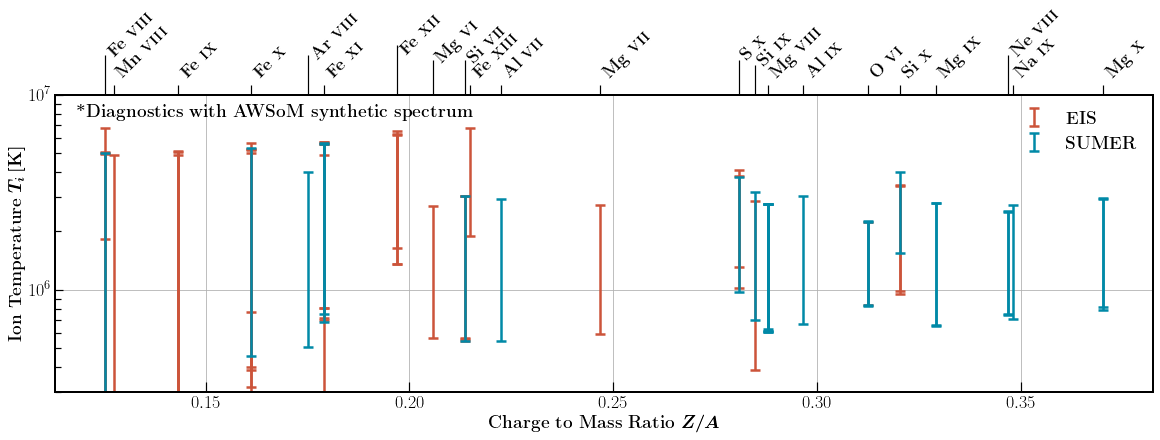

In [29]:
fig,ax = plt.subplots(figsize=(16,6),constrained_layout=True)
ax.errorbar(line_z2a_all[:33],temp_aver_all[:33],[(temp_aver_all-temp_min_all)[:33],(temp_max_all-temp_aver_all)[:33]],
            marker=None,fmt="none",capsize=5,lw=2.5,color = "#CC543A",label=r"\textbf{EIS}",capthick=2.5)
ax.errorbar(line_z2a_all[33:],temp_aver_all[33:],[(temp_aver_all-temp_min_all)[33:],(temp_max_all-temp_aver_all)[33:]],
            marker=None,fmt="none",capsize=5,lw=2.5,color = "#0089A7",label=r"\textbf{SUMER}",capthick=2.5)
ax.set_yscale("log")
# for ii in range(33):
#     ax.text(line_z2a_all[ii],temp_aver_all[ii],line_id_latex_all[ii],ha = 'center',va = 'center',
#             color = 'red',fontsize = 15,linespacing=1.5)
# for ii in range(33,len(line_z2a_all)):
#     ax.text(line_z2a_all[ii],temp_aver_all[ii],line_id_latex_all[ii],ha = 'center',va = 'center',
#             color = 'blue',fontsize = 15,linespacing=1.5)

ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge_stat"] + r"}}"

ax_ion = ax.twiny()
ax_ion.set_xlim(ax.get_xlim())
ax_ion.set_xticks(df_ion["Z/A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=18)

tick_len_index = [1,9,13,15,17,25,27,39]
tick_len = [40,40,50,35,35,35,30,40]
label_index = [0,4,6,7,8,12,13,19]
label_pos = [1.07,1.06,1.08,1.05,1.05,1.06,1.04,1.07]
ax_ion_major_ticks = ax_ion.get_xticklines()
ax_ion_major_labels = ax_ion.get_xmajorticklabels()
for tick_len_index_, tick_len_, label_index_, label_pos_ in zip(tick_len_index, tick_len, label_index, label_pos):
    ax_ion_major_ticks[tick_len_index_].set_markersize(tick_len_)
    ax_ion_major_labels[label_index_].set_y(label_pos_)
#ax.set_ylim(3e5,1e7)
#ax.set_xticks(np.arange(10))
#ax.set_xticklabels(line_id_latex)
ax.tick_params(labelsize=18,direction="in",which="both")
ax.set_xlabel(r"\textbf{Charge to Mass Ratio} $\boldsymbol{Z/A}$",fontsize=18)
ax.set_ylabel(r"\textbf{Ion Temperature} $\boldsymbol{T_i\,\mathrm{[K]}}$",fontsize=18)
ax.text(0.02,0.97,r"\textbf{*Diagnostics with AWSoM synthetic spectrum}",
fontsize=18,transform=ax.transAxes,va="top",ha="left")
#ax.xaxis.set_major_locator(plt.MaxNLocator(13))
ax.set_ylim((3e5,1e7))
ax.grid("on")
ax.legend(loc="upper right",fontsize=18,frameon=False)
plt.savefig(fname="../../figs/ms/AWSoM_pseu_Ti.pdf")